In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2024-02-17 13:59:34--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.207, 108.177.111.207, 142.250.1.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   215MB/s    in 0.3s    

2024-02-17 13:59:34 (215 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from keras.optimizers import RMSprop

model = keras.models.Sequential([
    keras.layers.Conv2D(
        filters = 16, kernel_size = (3, 3),
        activation = 'relu', input_shape = (150, 150, 3)
    ),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(
        filters = 32, kernel_size = (3, 3),
        activation = 'relu'
    ),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(
        filters = 64,kernel_size = (3,3),
        activation = 'relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(
        filters = 128, kernel_size = (3,3),
        activation = 'relu'
    ),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),

    keras.layers.Dense(units = 512, activation = 'relu'),
    keras.layers.Dense(units = 1, activation = 'sigmoid')
    ])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 64)       

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 2
)

Epoch 1/20
100/100 - 31s - loss: 0.7021 - accuracy: 0.5165 - val_loss: 0.6898 - val_accuracy: 0.6570 - 31s/epoch - 310ms/step
Epoch 2/20
100/100 - 30s - loss: 0.6778 - accuracy: 0.5935 - val_loss: 0.7150 - val_accuracy: 0.5140 - 30s/epoch - 299ms/step
Epoch 3/20
100/100 - 30s - loss: 0.6374 - accuracy: 0.6470 - val_loss: 0.6273 - val_accuracy: 0.6340 - 30s/epoch - 301ms/step
Epoch 4/20
100/100 - 30s - loss: 0.5978 - accuracy: 0.6765 - val_loss: 0.6222 - val_accuracy: 0.6560 - 30s/epoch - 300ms/step
Epoch 5/20
100/100 - 30s - loss: 0.5623 - accuracy: 0.7095 - val_loss: 0.5797 - val_accuracy: 0.6900 - 30s/epoch - 299ms/step
Epoch 6/20
100/100 - 30s - loss: 0.5244 - accuracy: 0.7400 - val_loss: 0.8082 - val_accuracy: 0.6310 - 30s/epoch - 295ms/step
Epoch 7/20
100/100 - 30s - loss: 0.4850 - accuracy: 0.7620 - val_loss: 0.5290 - val_accuracy: 0.7500 - 30s/epoch - 301ms/step
Epoch 8/20
100/100 - 31s - loss: 0.4360 - accuracy: 0.8000 - val_loss: 0.5868 - val_accuracy: 0.7200 - 31s/epoch - 309

In [ ]:
history

In [ ]:
def plot_loss_acc(model):

    acc = model.history['accuracy']
    val_acc = model.history['val_accuracy']
    loss = model.history['loss']
    val_loss = model.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc,  label='Training Accuracy')
    plt.plot(epochs, val_acc,  label='Validation Accuracy')
    plt.title("Training and Validation Accuracy")

    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title("Training and Validation Loss")

    plt.legend()

    plt.show()



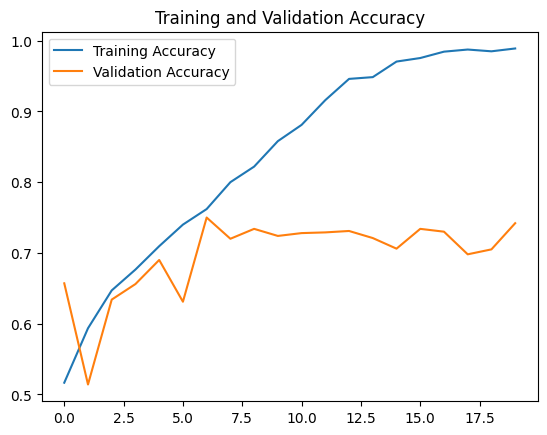

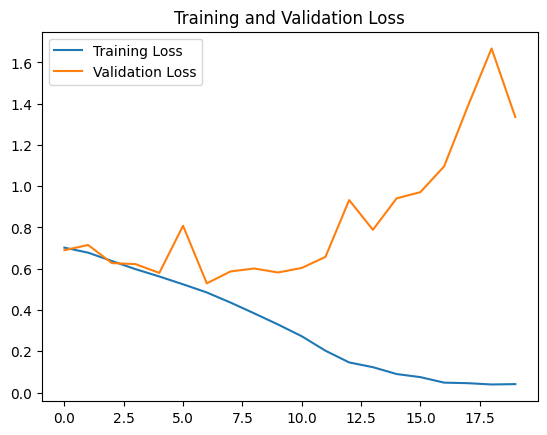

In [ ]:
plot_loss_acc(history)

In [ ]:
# images with augmentation

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 40,
    width_shift_range= 0.2,
    height_shift_range= 0.2,
    shear_range=  0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = "binary"

)

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)


model_augmentation = keras.models.Sequential([
    keras.layers.Conv2D(
        filters = 16, kernel_size = (3, 3),
        activation = 'relu', input_shape = (150, 150, 3)
    ),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(
        filters = 32, kernel_size = (3, 3),
        activation = 'relu'
    ),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(
        filters = 64,kernel_size = (3,3),
        activation = 'relu'),
    keras.layers.MaxPooling2D(2, 2),

    keras.layers.Conv2D(
        filters = 128, kernel_size = (3,3),
        activation = 'relu'
    ),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),

    keras.layers.Dense(units = 512, activation = 'relu'),
    keras.layers.Dense(units = 1, activation = 'sigmoid')
    ])


model_augmentation.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate = 0.001),
              metrics = ['accuracy'])

history_augmentation = model_augmentation.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 2
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 36s - loss: 0.7286 - accuracy: 0.5315 - val_loss: 0.6875 - val_accuracy: 0.6100 - 36s/epoch - 361ms/step
Epoch 2/20
100/100 - 36s - loss: 0.6974 - accuracy: 0.5620 - val_loss: 0.6687 - val_accuracy: 0.5990 - 36s/epoch - 357ms/step
Epoch 3/20
100/100 - 36s - loss: 0.6792 - accuracy: 0.5815 - val_loss: 0.6757 - val_accuracy: 0.5050 - 36s/epoch - 358ms/step
Epoch 4/20
100/100 - 35s - loss: 0.6711 - accuracy: 0.5815 - val_loss: 0.6704 - val_accuracy: 0.5370 - 35s/epoch - 347ms/step
Epoch 5/20
100/100 - 35s - loss: 0.6534 - accuracy: 0.6030 - val_loss: 0.6024 - val_accuracy: 0.6880 - 35s/epoch - 347ms/step
Epoch 6/20
100/100 - 36s - loss: 0.6285 - accuracy: 0.6375 - val_loss: 0.5943 - val_accuracy: 0.6820 - 36s/epoch - 358ms/step
Epoch 7/20
100/100 - 35s - loss: 0.6252 - accuracy: 0.6530 - val_loss: 0.6192 - val_accuracy: 0.6440 - 35s/epoch - 352ms/step
Epoch 8/20
100/100 - 35s - loss: 0

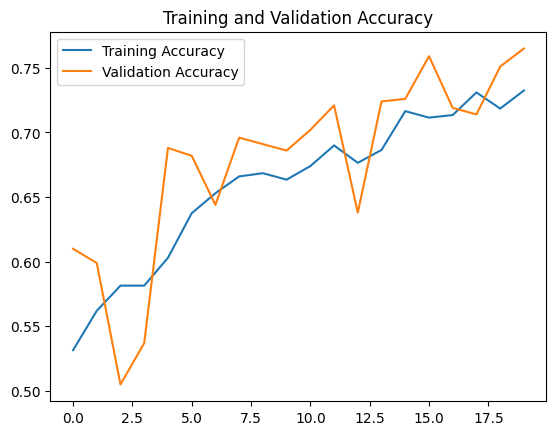

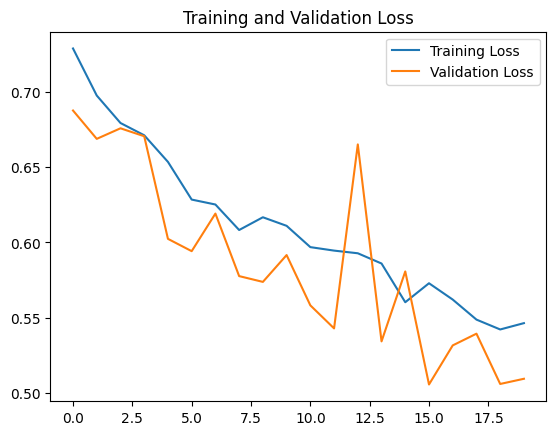

In [ ]:
plot_loss_acc(history_augmentation)

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
cats = 0
dogs = 0

for i in uploaded.keys():

    path = '/content/' + i
    img = image.load_img(path, target_size = (150, 150))

    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])


    classes = model_augmentation.predict(images, batch_size = 20)

    print(classes[0])

    if classes[0]>0.5:
        print(i + " is a dog")
        dogs+=1

    else:
        print(i + " is a cat")
        cats+=1

Saving dog 1.jpg to dog 1 (5).jpg
Saving dog 4.jpg to dog 4 (2).jpg
Saving dog.jpg to dog (3).jpg
Saving dog2.jpg to dog2 (4).jpg
Saving dog3.jpg to dog3 (2).jpg
Saving dog5.jpg to dog5 (2).jpg
Saving karsten-winegeart-NE0XGVKTmcA-unsplash.jpg to karsten-winegeart-NE0XGVKTmcA-unsplash (2).jpg
Saving photo-1552053831-71594a27632d.jpeg to photo-1552053831-71594a27632d.jpeg
1/1 [==============================] - 0s 20ms/step
[0.99717134]
dog 1 (5).jpg is a dog
1/1 [==============================] - 0s 19ms/step
[0.7441029]
dog 4 (2).jpg is a dog
1/1 [==============================] - 0s 21ms/step
[0.76590866]
dog (3).jpg is a dog
1/1 [==============================] - 0s 23ms/step
[0.9998241]
dog2 (4).jpg is a dog
1/1 [==============================] - 0s 21ms/step
[0.74354106]
dog3 (2).jpg is a dog
1/1 [==============================] - 0s 21ms/step
[0.847931]
dog5 (2).jpg is a dog
1/1 [==============================] - 0s 22ms/step
[0.46841028]
karsten-winegeart-NE0XGVKTmcA-unsplash (2)

In [ ]:
print("Cats with augmentation = ",cats)
print("Dogs with augmentation = ",dogs)

Cats with augmentation =  1
Dogs with augmentation =  7


In [ ]:
uploaded = files.upload()
dog = 0
cat = 0
for i in uploaded.keys():

    path = '/content/' + i
    img = image.load_img(path, target_size = (150, 150))

    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis = 0)
    images = np.vstack([x])


    classes = model.predict(images, batch_size = 20)

    print(classes[0])

    if classes[0]>0.5:
        print(i + " is a dog")
        dog+=1

    else:
        print(i + " is a cat")
        cat+=1

Saving dog 1.jpg to dog 1 (6).jpg
Saving dog 4.jpg to dog 4 (3).jpg
Saving dog.jpg to dog (4).jpg
Saving dog2.jpg to dog2 (5).jpg
Saving dog3.jpg to dog3 (3).jpg
Saving dog5.jpg to dog5 (3).jpg
Saving karsten-winegeart-NE0XGVKTmcA-unsplash.jpg to karsten-winegeart-NE0XGVKTmcA-unsplash (3).jpg
Saving photo-1552053831-71594a27632d.jpeg to photo-1552053831-71594a27632d (1).jpeg
1/1 [==============================] - 0s 20ms/step
[1.]
dog 1 (6).jpg is a dog
1/1 [==============================] - 0s 19ms/step
[0.99999803]
dog 4 (3).jpg is a dog
1/1 [==============================] - 0s 19ms/step
[0.6941589]
dog (4).jpg is a dog
1/1 [==============================] - 0s 20ms/step
[1.]
dog2 (5).jpg is a dog
1/1 [==============================] - 0s 21ms/step
[0.30998367]
dog3 (3).jpg is a cat
1/1 [==============================] - 0s 26ms/step
[0.99874216]
dog5 (3).jpg is a dog
1/1 [==============================] - 0s 22ms/step
[0.77052724]
karsten-winegeart-NE0XGVKTmcA-unsplash (3).jpg is a

In [ ]:
print("Cats = ",cat)
print("Dogs = ",dog)

Cats =  2
Dogs =  6
